<a href="https://colab.research.google.com/github/StillWork/AIPM/blob/main/PM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# 데이터셋을 Google Colab 환경으로 가져오기
df = pd.read_csv("https://raw.githubusercontent.com/Sercan1111/Predictive-Maintenance-Classification/refs/heads/main/predictive_maintenance%20(1).csv")

# 데이터셋의 처음 100개 행을 출력하여 데이터 구조 및 내용을 확인합니다.
df.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,96,M14955,M,299.0,309.0,1351,52.2,44,0,No Failure
96,97,M14956,M,299.0,309.0,1575,35.3,47,0,No Failure
97,98,M14957,M,298.9,308.9,1750,29.9,50,0,No Failure
98,99,L47278,L,298.9,308.8,1529,32.7,53,0,No Failure


In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1KiX7kFJKna8wWKNw1rPv6rc-eaGthI27D_Yvd_K9_Sk/edit#gid=0


In [5]:
# 데이터프레임의 행(row) 및 열(column) 수를 확인합니다.
df.shape

(10000, 10)

In [6]:
# 'Product ID' 및 'UDI' 열은 예측 모델에 직접적으로 필요하지 않으므로 제거합니다.
df = df.drop(columns=['Product ID', 'UDI'])

# 업데이트된 데이터프레임의 처음 5개 행을 출력하여 변경 사항을 확인합니다.
print(df.head(5))

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [7]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [8]:
# 'Type' 열에 어떤 고유한 값들이 있는지 확인하여 제품 유형을 파악합니다.
unique_types = df['Type'].unique()
print(unique_types)

['M' 'L' 'H']


In [9]:
# 'Type' 범주형 변수를 원-핫 인코딩하여 더미 변수로 변환합니다.
# 이렇게 하면 머신러닝 모델이 이 범주형 데이터를 처리할 수 있게 됩니다.
df = pd.get_dummies(df, columns=['Type'], prefix='is')

# 더미 변수가 올바르게 생성되었는지 데이터프레임의 처음 5개 행을 출력하여 확인합니다.
print(df.head(5))

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type   is_H   is_L   is_M  
0         42.8                0       0   No Failure  False  False   True  
1         46.3                3       0   No Failure  False   True  False  
2         49.4                5       0   No Failure  False   True  False  
3         39.5                7       0   No Failure  False   True  False  
4         40.0                9       0   No Failure  False   True  False  


In [10]:
# 원-핫 인코딩으로 생성된 불리언(True/False) 값을 정수(1/0)로 변환합니다.
# 이는 대부분의 머신러닝 알고리즘에서 정수 입력을 선호하기 때문입니다.
df['is_H'] = df['is_H'].astype(int)
df['is_L'] = df['is_L'].astype(int)
df['is_M'] = df['is_M'].astype(int)

# 변환된 데이터프레임의 처음 5개 행을 출력하여 정수 변환이 올바르게 적용되었는지 확인합니다.
print(df.head(5))

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  is_H  is_L  is_M  
0         42.8                0       0   No Failure     0     0     1  
1         46.3                3       0   No Failure     0     1     0  
2         49.4                5       0   No Failure     0     1     0  
3         39.5                7       0   No Failure     0     1     0  
4         40.0                9       0   No Failure     0     1     0  


In [11]:
# 'Failure Type' 열에 어떤 고유한 값들이 있는지 확인하고, 그 개수를 파악합니다.
# 이는 다양한 고장 유형을 이해하는 데 도움이 됩니다.
unique_failure_types = df['Failure Type'].unique()
number_of_unique_failure_types = len(unique_failure_types)

# 고유한 고장 유형 목록과 그 개수를 출력합니다.
print("Unique Failure Types:", unique_failure_types)
print("Number of Unique Failure Types:", number_of_unique_failure_types)

Unique Failure Types: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
Number of Unique Failure Types: 6


In [12]:
# 'Failure Type' 범주형 변수를 원-핫 인코딩하여 더미 변수로 변환합니다.
df = pd.get_dummies(df, columns=['Failure Type'], prefix='is')

# 더미 변수로 생성된 불리언(True/False) 값을 정수(1/0)로 변환합니다.
df = df.astype(int)

# 변환된 데이터프레임의 처음 5개 행을 출력하여 변환이 올바르게 적용되었는지 확인합니다.
print(df.head(5))

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298                      308                    1551   
1                  298                      308                    1408   
2                  298                      308                    1498   
3                  298                      308                    1433   
4                  298                      308                    1408   

   Torque [Nm]  Tool wear [min]  Target  is_H  is_L  is_M  \
0           42                0       0     0     0     1   
1           46                3       0     0     1     0   
2           49                5       0     0     1     0   
3           39                7       0     0     1     0   
4           40                9       0     0     1     0   

   is_Heat Dissipation Failure  is_No Failure  is_Overstrain Failure  \
0                            0              1                      0   
1                            0        

In [13]:
# 데이터프레임의 각 열(column)의 데이터 유형을 확인합니다.
# 이는 변수의 종류(정수, 실수 등)를 파악하는 데 중요합니다.
print(df.dtypes)

# 데이터 유형을 기반으로 이산(discrete) 변수와 연속(continuous) 변수를 구분합니다.
# 일반적으로 정수 및 불리언 유형은 이산 변수로, 실수 유형은 연속 변수로 간주됩니다.
discrete_variables = df.select_dtypes(include=['int', 'bool']).columns.tolist()
continuous_variables = df.select_dtypes(include=['float']).columns.tolist()

# 이산 변수와 연속 변수 목록을 출력합니다.
print("Discrete Variables:", discrete_variables)
print("Continuous Variables:", continuous_variables)

Air temperature [K]            int64
Process temperature [K]        int64
Rotational speed [rpm]         int64
Torque [Nm]                    int64
Tool wear [min]                int64
Target                         int64
is_H                           int64
is_L                           int64
is_M                           int64
is_Heat Dissipation Failure    int64
is_No Failure                  int64
is_Overstrain Failure          int64
is_Power Failure               int64
is_Random Failures             int64
is_Tool Wear Failure           int64
dtype: object
Discrete Variables: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'is_H', 'is_L', 'is_M', 'is_Heat Dissipation Failure', 'is_No Failure', 'is_Overstrain Failure', 'is_Power Failure', 'is_Random Failures', 'is_Tool Wear Failure']
Continuous Variables: []


In [18]:
import matplotlib.pyplot as plt

# 분석에서 독립 변수로 사용될 가능성이 있는 열 목록입니다.
# 이들은 고장 발생 여부 또는 특정 고장 유형과 관련이 있을 수 있습니다.
independent_features = [
    'is_Heat Dissipation Failure',
    'is_No Failure',
    'is_Overstrain Failure',
    'is_Power Failure',
    'is_Random Failures',
    'is_Tool Wear Failure',
    'Target' # 'Target' 열도 독립 변수 분석에 포함될 수 있습니다.
]

# 전체 데이터프레임 열에서 독립 변수 목록에 없는 열들을 종속 변수로 정의합니다.
dependent_features = [col for col in df.columns if col not in independent_features]

# 각 독립 변수와 각 종속 변수 간의 관계를 시각화하기 위해 중첩 루프를 사용합니다.
# 각 독립 변수의 값에 따른 종속 변수의 평균을 막대 그래프로 나타냅니다.
# for ind_feature in independent_features:
#     for dep_feature in dependent_features:
#         plt.figure(figsize=(10, 6)) # 그래프 크기 설정
#         # 독립 변수별로 데이터를 그룹화하고 종속 변수의 평균을 계산합니다.
#         mean_value = df.groupby(ind_feature)[dep_feature].mean()
#         # 계산된 평균 값을 막대 그래프로 그립니다.
#         mean_value.plot(kind='bar', alpha=0.7)
#         plt.title(f'{dep_feature} vs {ind_feature}') # 그래프 제목 설정
#         plt.xlabel(ind_feature) # x축 라벨 설정
#         plt.ylabel(f'Average {dep_feature}') # y축 라벨 설정
#         plt.show() # 그래프 출력

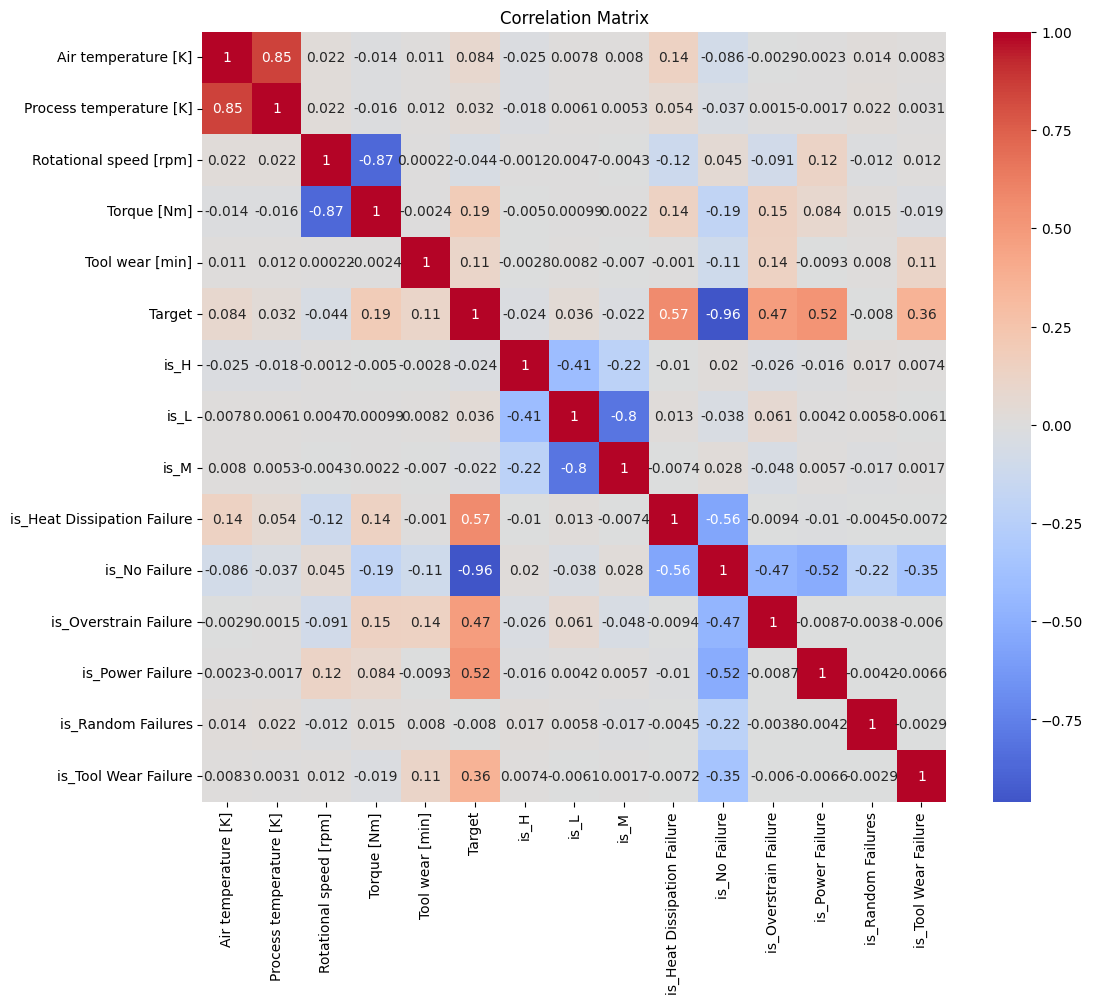

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 모든 열 간의 상관 관계를 계산하여 상관 행렬을 생성합니다.
# 상관 행렬은 변수들 간의 선형 관계의 강도와 방향을 보여줍니다.
corr_matrix = df.corr()

# 계산된 상관 행렬을 히트맵으로 시각화합니다.
# 히트맵은 색상의 강도를 사용하여 상관 관계의 강도를 나타내어 패턴을 쉽게 파악할 수 있게 합니다.
plt.figure(figsize=(12, 10)) # 히트맵 크기 설정
# annot=True는 각 셀에 상관 계수 값을 표시하고, cmap='coolwarm'는 색상 맵을 설정합니다.
# center=0은 0을 중심으로 색상을 구분하여 양의 상관 관계는 따뜻한 색, 음의 상관 관계는 차가운 색으로 표시합니다.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix') # 히트맵 제목 설정
plt.show() # 히트맵 출력

In [15]:
# 상관 행렬 분석 결과 'is_Random Failures' 열이 다른 변수들과 낮은 상관 관계를 보이므로 제거합니다.
# 모델 성능에 크게 기여하지 않거나 노이즈로 작용할 수 있는 열을 제거하는 것은 일반적인 데이터 전처리 과정입니다.
df = df.drop(columns=['is_Random Failures'])

# 'is_Random Failures' 열이 성공적으로 제거되었는지 확인하기 위해 업데이트된 데이터프레임의 처음 5개 행을 출력합니다.
print(df.head(5))

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298                      308                    1551   
1                  298                      308                    1408   
2                  298                      308                    1498   
3                  298                      308                    1433   
4                  298                      308                    1408   

   Torque [Nm]  Tool wear [min]  Target  is_H  is_L  is_M  \
0           42                0       0     0     0     1   
1           46                3       0     0     1     0   
2           49                5       0     0     1     0   
3           39                7       0     0     1     0   
4           40                9       0     0     1     0   

   is_Heat Dissipation Failure  is_No Failure  is_Overstrain Failure  \
0                            0              1                      0   
1                            0        

In [16]:
# 데이터프레임에 결측값(Null values)이 있는지 확인합니다.
# 결측값은 데이터 분석 및 모델링에 문제를 일으킬 수 있으므로 처리해야 합니다.
null_values = df.isnull().sum()
# 각 열의 결측값 개수를 출력합니다.
print(null_values)
# 출력 결과 모든 열의 결측값이 0임을 확인하여 데이터가 깨끗함을 알 수 있습니다.

Air temperature [K]            0
Process temperature [K]        0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Target                         0
is_H                           0
is_L                           0
is_M                           0
is_Heat Dissipation Failure    0
is_No Failure                  0
is_Overstrain Failure          0
is_Power Failure               0
is_Tool Wear Failure           0
dtype: int64


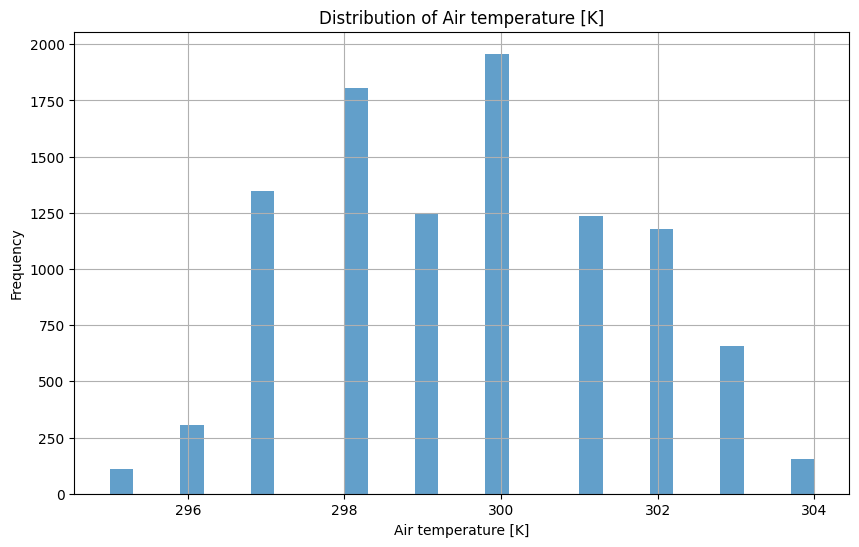

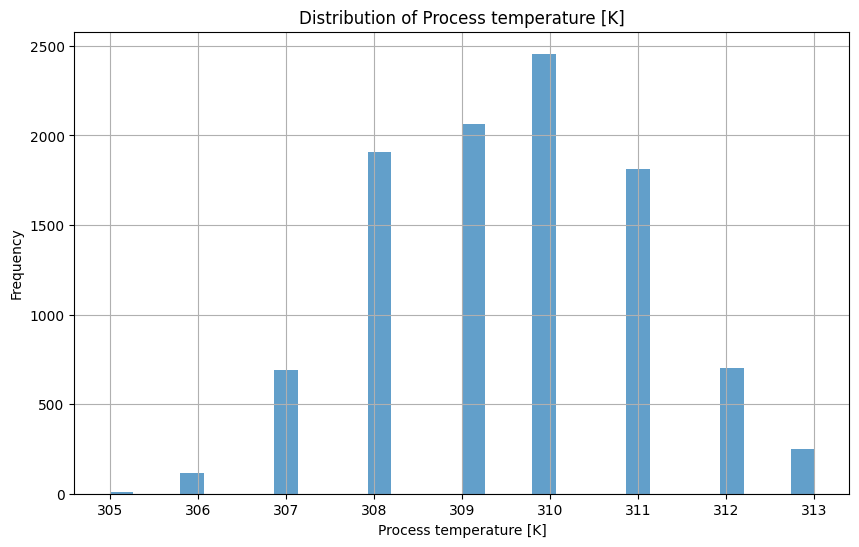

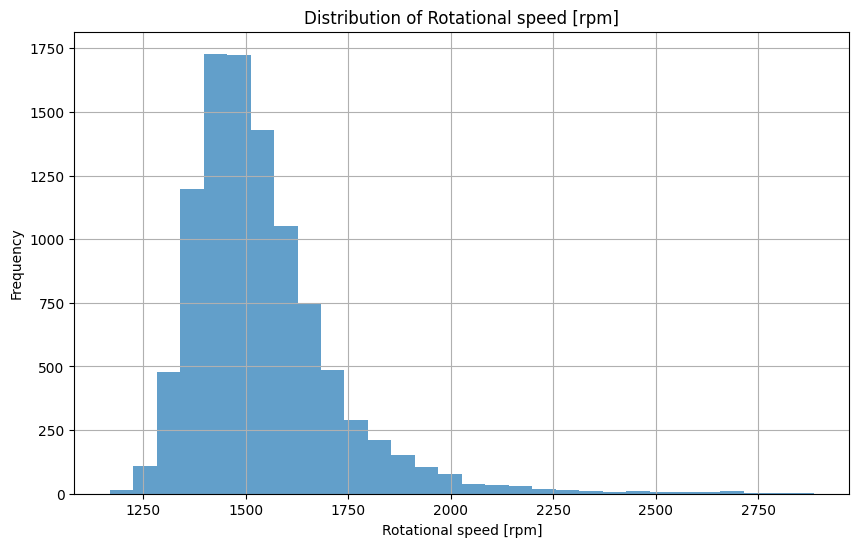

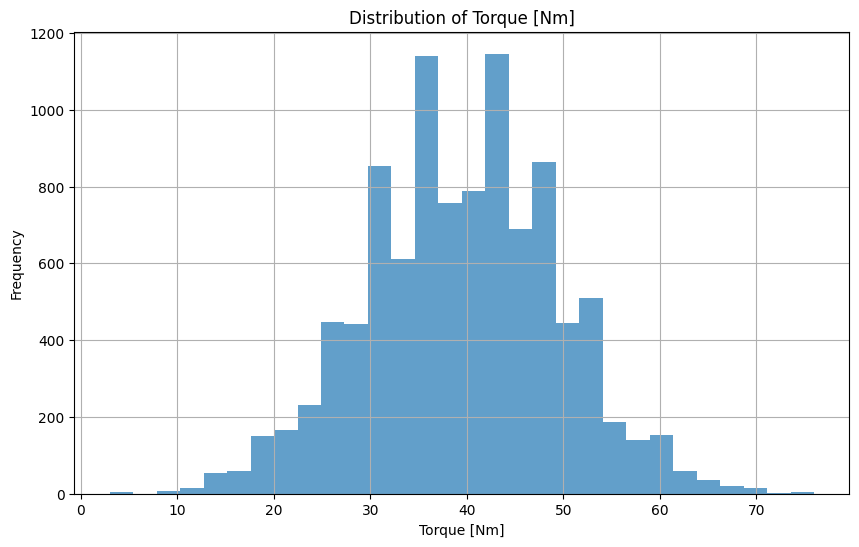

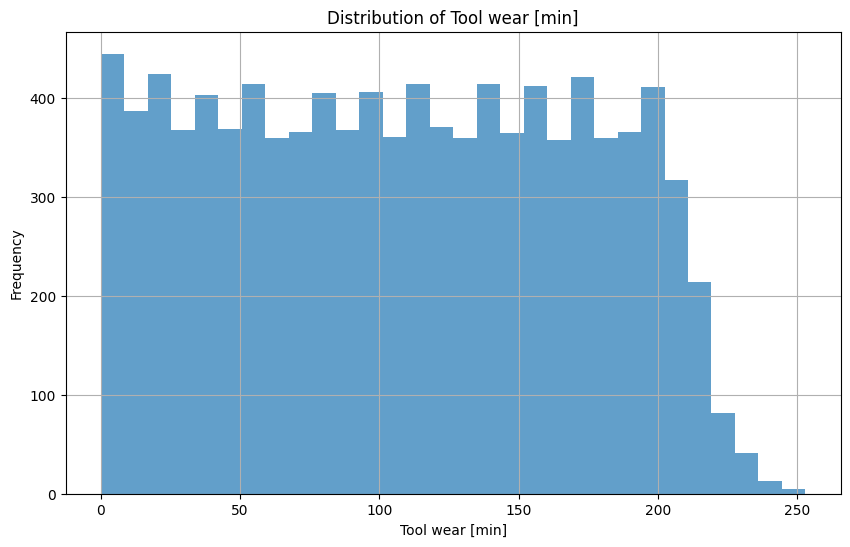

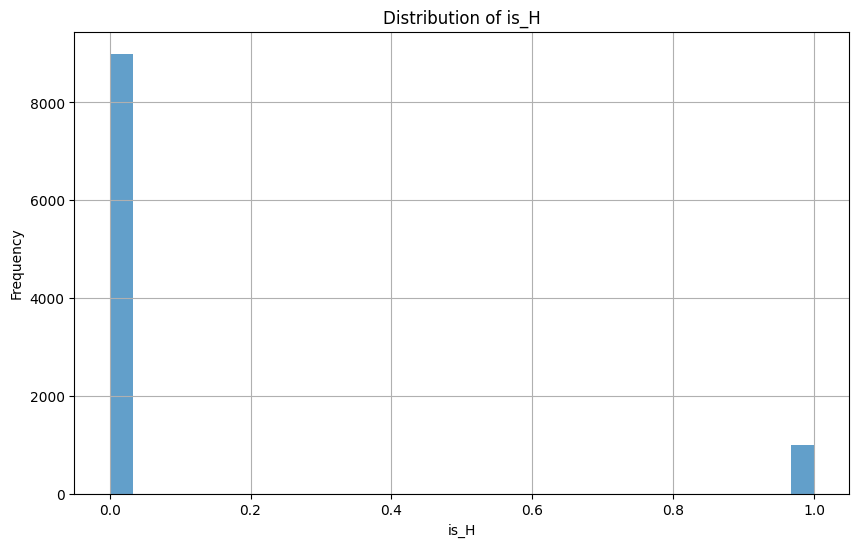

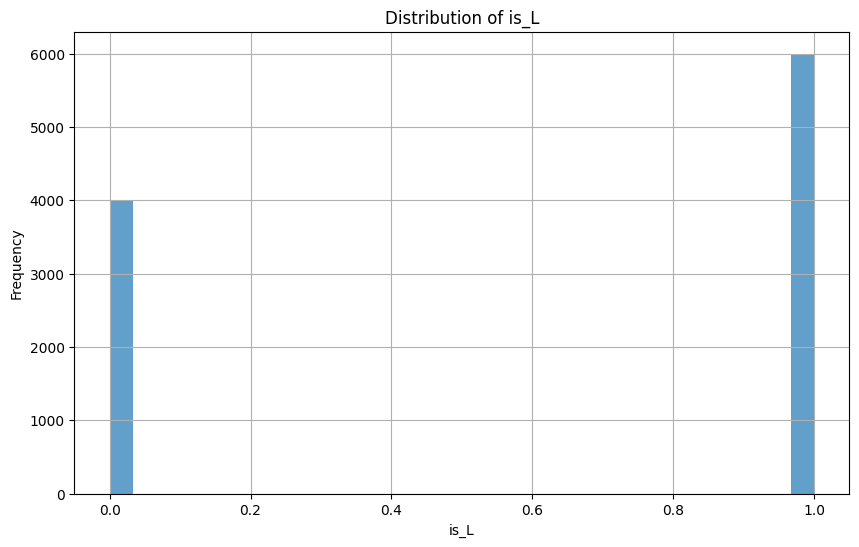

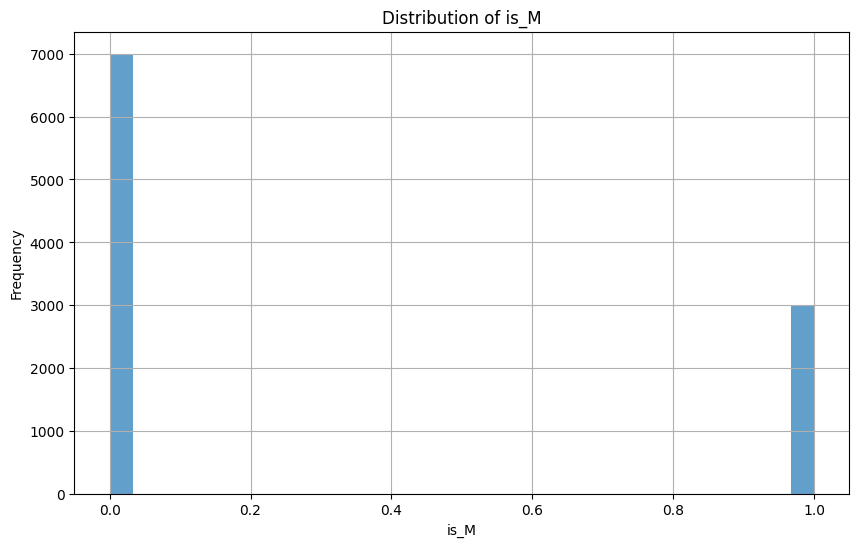

In [19]:
import matplotlib.pyplot as plt

# 종속 변수 목록입니다. 이 변수들의 분포를 시각화하여 이해합니다.
dependent_features = [col for col in df.columns if col not in independent_features]

# 각 종속 변수에 대해 히스토그램을 그립니다.
# 히스토그램은 변수의 값 분포와 빈도를 보여줍니다.
for feature in dependent_features:
    plt.figure(figsize=(10, 6)) # 그래프 크기 설정
    df[feature].hist(bins=30, alpha=0.7) # 30개의 빈을 사용하여 히스토그램을 그립니다. alpha는 투명도 설정입니다.
    plt.title(f'Distribution of {feature}') # 그래프 제목 설정
    plt.xlabel(feature) # x축 라벨 설정
    plt.ylabel('Frequency') # y축 라벨 설정
    plt.show() # 그래프 출력

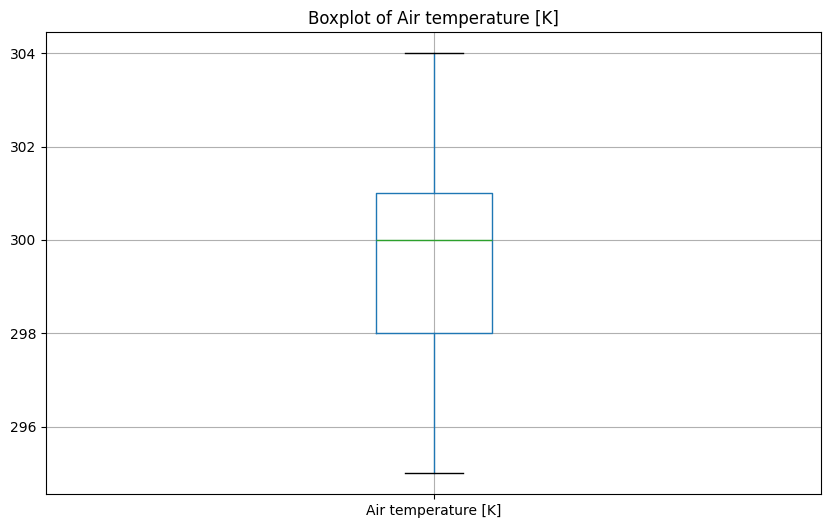

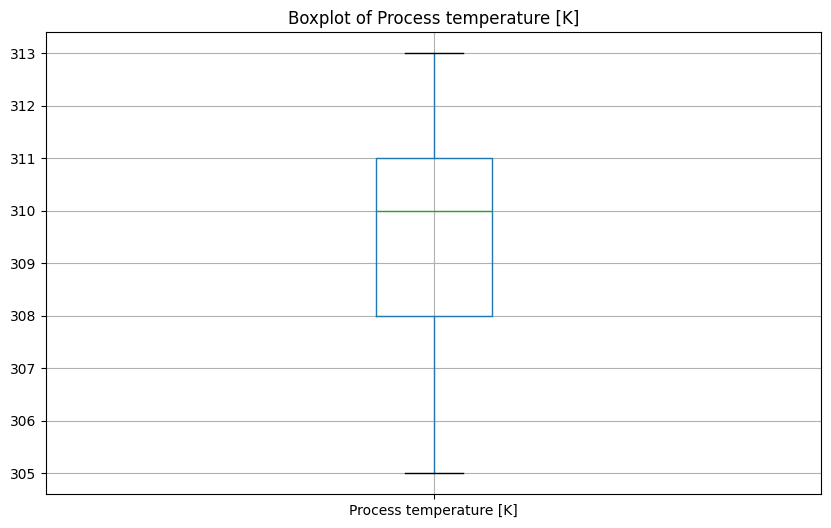

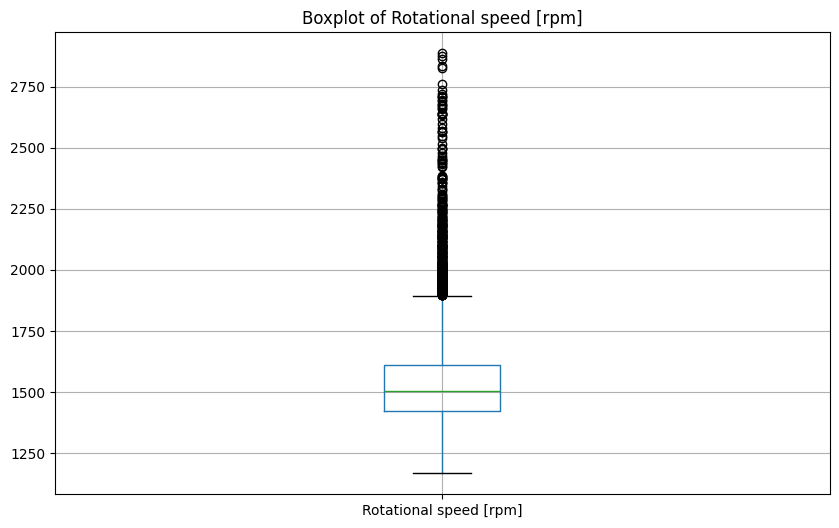

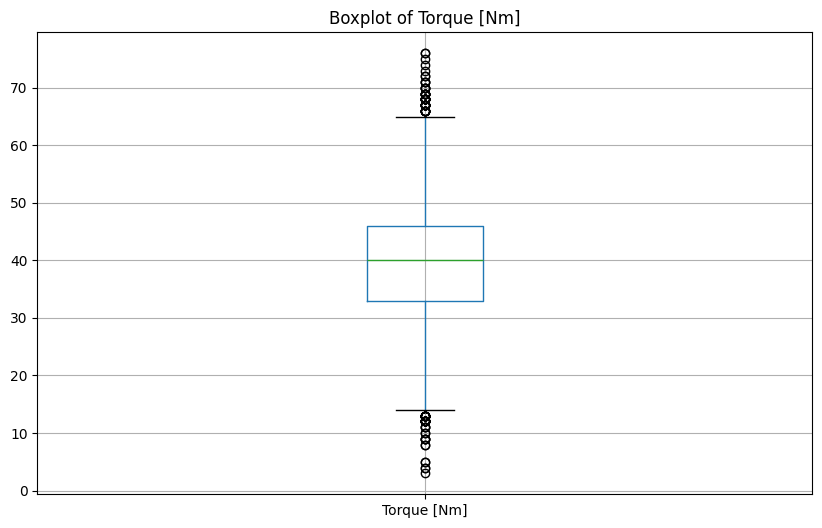

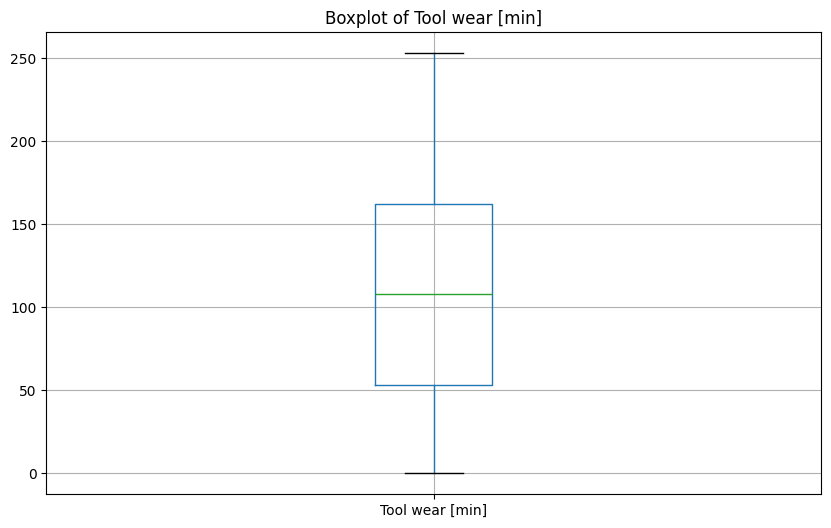

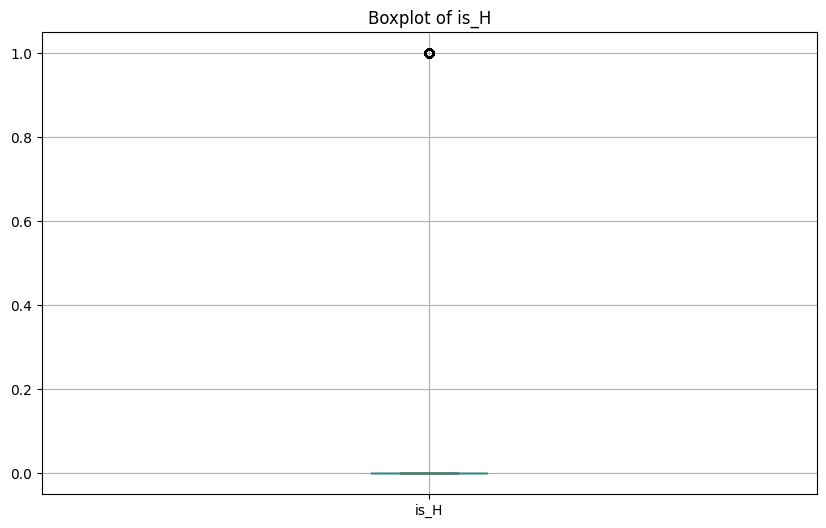

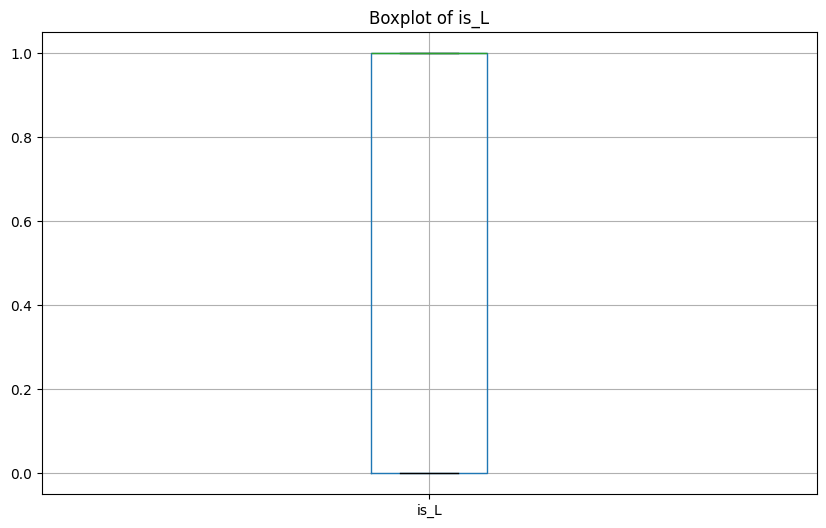

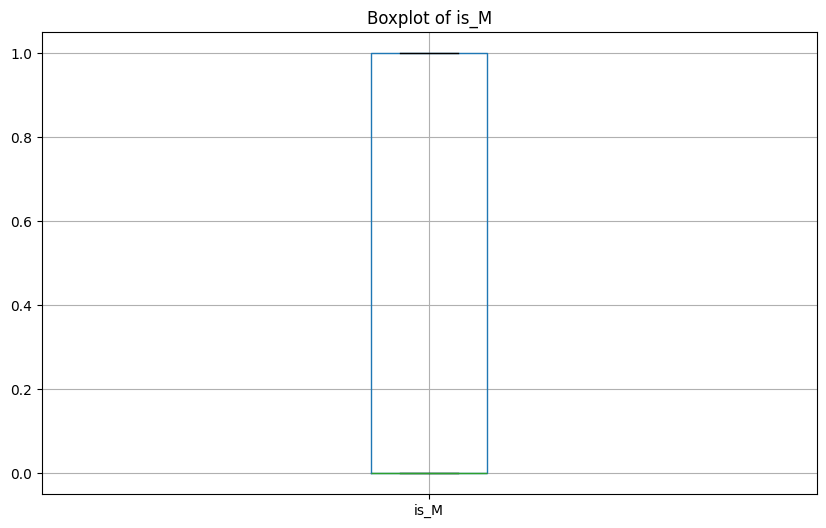

In [20]:
# 각 종속 변수에 대해 박스플롯을 그립니다.
# 박스플롯은 데이터의 분포, 중앙값, 사분위수 및 이상치(outliers)를 시각적으로 보여줍니다.
for feature in dependent_features:
    plt.figure(figsize=(10, 6)) # 그래프 크기 설정
    df.boxplot(column=[feature]) # 특정 열에 대한 박스플롯을 그립니다.
    plt.title(f'Boxplot of {feature}') # 그래프 제목 설정
    plt.show() # 그래프 출력

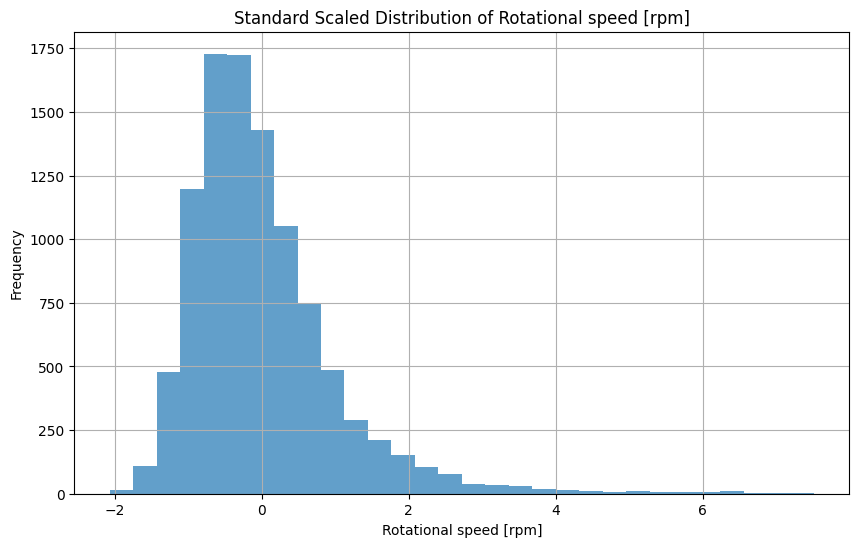

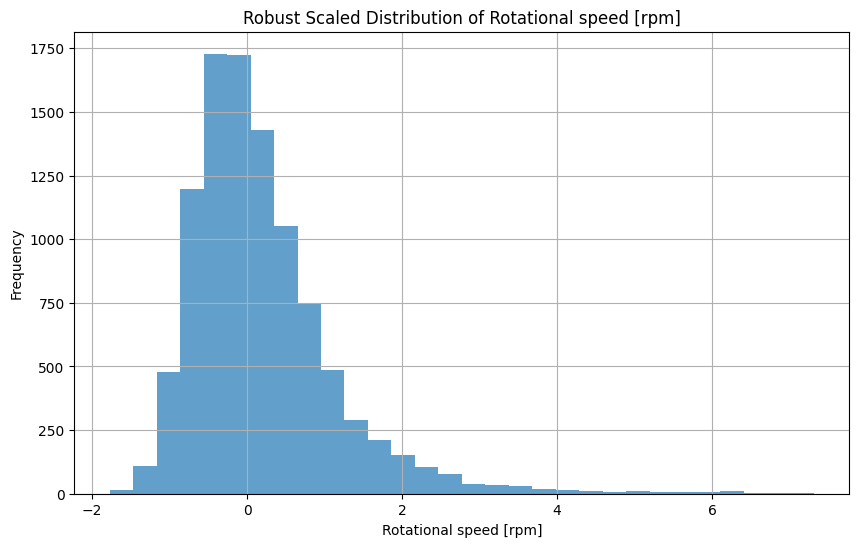

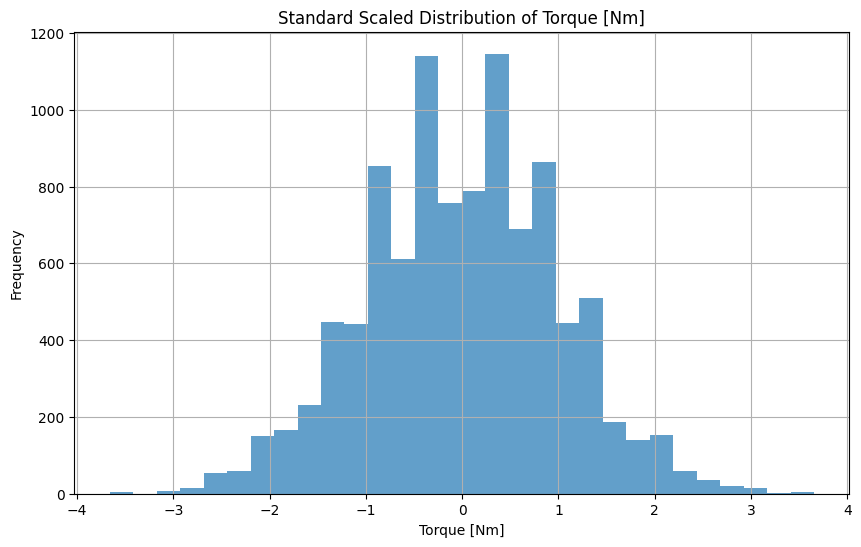

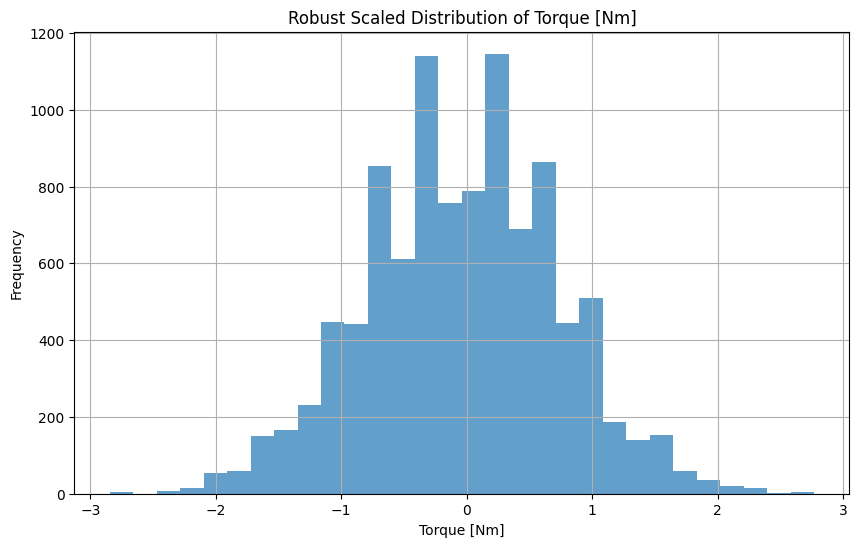

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

# 스케일링을 적용할 종속 변수 목록입니다.
dependent_features = ['Rotational speed [rpm]', 'Torque [Nm]']

# StandardScaler와 RobustScaler 객체를 생성합니다.
# StandardScaler는 데이터를 평균 0과 표준 편차 1로 스케일링합니다.
# RobustScaler는 중앙값과 IQR(사분위수 범위)을 사용하여 이상치에 덜 민감하게 스케일링합니다.
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

# StandardScaler를 사용하여 선택된 종속 변수들을 스케일링합니다.
df_standard_scaled = df.copy() # 원본 데이터프레임을 복사하여 스케일링 결과를 저장할 새 데이터프레임을 만듭니다.
df_standard_scaled[dependent_features] = scaler_standard.fit_transform(df[dependent_features]) # 스케일링 적용

# RobustScaler를 사용하여 선택된 종속 변수들을 스케일링합니다.
df_robust_scaled = df.copy() # 원본 데이터프레임을 복사하여 스케일링 결과를 저장할 새 데이터프레임을 만듭니다.
df_robust_scaled[dependent_features] = scaler_robust.fit_transform(df[dependent_features]) # 스케일링 적용

# 스케일링된 데이터의 분포를 확인하기 위해 히스토그램을 그립니다.
# 스케일링 전 분포와 비교하여 스케일링이 데이터 분포에 어떤 영향을 미치는지 시각적으로 확인합니다.
for feature in dependent_features:
    plt.figure(figsize=(10, 6)) # 그래프 크기 설정
    df_standard_scaled[feature].hist(bins=30, alpha=0.7) # StandardScaler 적용 후 히스토그램
    plt.title(f'Standard Scaled Distribution of {feature}') # 제목 설정
    plt.xlabel(feature) # x축 라벨 설정
    plt.ylabel('Frequency') # y축 라벨 설정
    plt.show() # 그래프 출력

    plt.figure(figsize=(10, 6)) # 그래프 크기 설정
    df_robust_scaled[feature].hist(bins=30, alpha=0.7) # RobustScaler 적용 후 히스토그램
    plt.title(f'Robust Scaled Distribution of {feature}') # 제목 설정
    plt.xlabel(feature) # x축 라벨 설정
    plt.ylabel('Frequency') # y축 라벨 설정
    plt.show() # 그래프 출력

## 로그변환

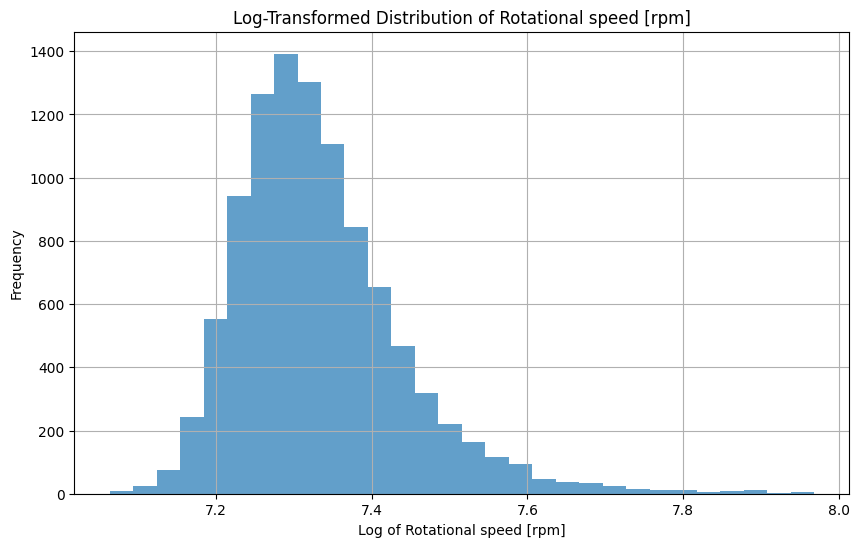

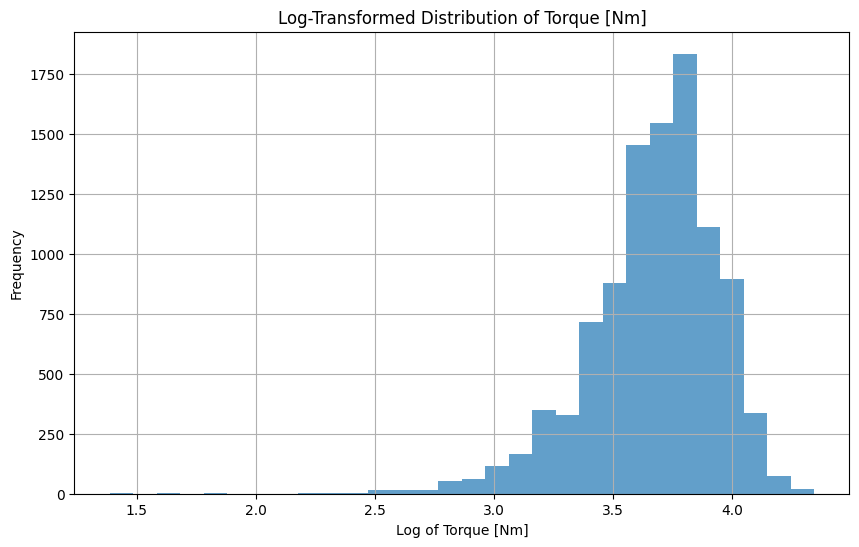

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 'Rotational speed [rpm]' 및 'Torque [Nm]' 열에 로그 변환을 적용합니다.
# 로그 변환은 데이터의 왜곡을 줄이고 정규 분포에 가깝게 만들 수 있습니다.
# 로그 변환 시 0 또는 음수 값에 대한 오류를 피하기 위해 작은 상수(예: 1)를 더할 수 있습니다.
# 현재 데이터셋은 0 또는 음수 값이 없는 것으로 확인되었지만, 일반적으로 고려할 사항입니다.
df['Rotational speed [rpm]'] = np.log(df['Rotational speed [rpm]'])
df['Torque [Nm]'] = np.log(df['Torque [Nm]'])


# 로그 변환된 'Rotational speed [rpm]' 및 'Torque [Nm]' 열의 분포를 히스토그램으로 시각화합니다.
# 변환 후 데이터 분포가 어떻게 변화했는지 확인합니다.
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
df['Rotational speed [rpm]'].hist(bins=30, alpha=0.7) # 로그 변환된 Rotational speed 히스토그램
plt.title('Log-Transformed Distribution of Rotational speed [rpm]') # 제목 설정
plt.xlabel('Log of Rotational speed [rpm]') # x축 라벨 설정
plt.ylabel('Frequency') # y축 라벨 설정
plt.show() # 그래프 출력

plt.figure(figsize=(10, 6)) # 그래프 크기 설정
df['Torque [Nm]'].hist(bins=30, alpha=0.7) # 로그 변환된 Torque 히스토그램
plt.title('Log-Transformed Distribution of Torque [Nm]') # 제목 설정
plt.xlabel('Log of Torque [Nm]') # x축 라벨 설정
plt.ylabel('Frequency') # y축 라벨 설정
plt.show() # 그래프 출력

# 이진 분류

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 이진 분류(binary classification)를 위해 데이터를 준비합니다.
# 'Target' 열을 예측 대상(종속 변수 y)으로 설정하고 나머지 열을 독립 변수 X로 설정합니다.
# 'Target' 열은 기계가 고장났는지(1) 또는 정상 작동하는지(0)를 나타냅니다.
X = df.drop(columns=['Target']) # 'Target' 열을 제외한 모든 열을 독립 변수 X로 사용
y = df['Target'] # 'Target' 열을 종속 변수 y로 사용

# 데이터를 훈련 세트(training set)와 테스트 세트(test set)로 분할합니다.
# 훈련 세트는 모델을 학습시키는 데 사용되고, 테스트 세트는 학습된 모델의 성능을 평가하는 데 사용됩니다.
# test_size=0.2는 전체 데이터의 20%를 테스트 세트로 사용함을 의미합니다.
# random_state는 데이터를 분할할 때 무작위성을 제어하여 결과를 재현 가능하게 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 가우시안 나이브 베이즈(Gaussian Naive Bayes) 분류 모델 객체를 생성하고 훈련 데이터에 맞춰 학습시킵니다.
# 가우시안 나이브 베이즈는 각 특성이 정규 분포를 따른다고 가정하는 나이브 베이즈의 한 유형입니다.
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) # 훈련 데이터를 사용하여 모델 학습

# 학습된 모델을 사용하여 테스트 세트의 독립 변수(X_test)에 대한 예측을 수행합니다.
y_pred = nb_model.predict(X_test) # 테스트 데이터에 대한 예측 값 생성

# 모델의 성능을 평가합니다.
# Confusion Matrix는 실제 값과 예측 값 사이의 관계를 요약하여 보여줍니다.
# Classification Report는 정밀도(precision), 재현율(recall), F1-score 등의 지표를 제공합니다.
# Accuracy Score는 전체 예측 중 올바르게 예측된 비율을 나타냅니다.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # Classification Report 출력
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred)) # Accuracy Score 출력

Confusion Matrix:
[[1933    6]
 [   2   59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.91      0.97      0.94        61

    accuracy                           1.00      2000
   macro avg       0.95      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000


Accuracy Score:
0.996


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 원-핫 인코딩된 고장 유형 열을 기반으로 실제 고장 유형을 나타내는 새로운 'Failure Type' 열을 생성합니다.
# 이 열은 다중 클래스 분류의 대상 변수로 사용됩니다.
df['Failure Type'] = df.apply(
    lambda row: 'No Failure' if row['is_No Failure'] == 1 else
                'Heat Dissipation Failure' if row['is_Heat Dissipation Failure'] == 1 else
                'Overstrain Failure' if row['is_Overstrain Failure'] == 1 else
                'Power Failure' if row['is_Power Failure'] == 1 else
                'Tool Wear Failure', axis=1 # 행별로 함수 적용
)

# 다중 클래스 분류(multiclass classification)를 위해 데이터를 준비합니다.
# 'Target' 열 값이 1인 행(즉, 고장이 발생한 경우)만 선택하여 분석합니다.
# 'Failure Type' 열을 예측 대상(종속 변수 y_failure)으로 설정하고 해당 열과 'Target' 열을 제외한 나머지 열을 독립 변수 X_failure로 설정합니다.
failure_data = df[df['Target'] == 1] # 'Target'이 1인 데이터만 필터링
X_failure = failure_data.drop(columns=['Target', 'Failure Type']) # 독립 변수 X_failure 생성
y_failure = failure_data['Failure Type'] # 종속 변수 y_failure 생성

# 고장 데이터만 포함하는 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train_failure, X_test_failure, y_train_failure, y_test_failure = train_test_split(X_failure, y_failure, test_size=0.2, random_state=42)

# 가우시안 나이브 베이즈 모델 객체를 생성하고 고장 데이터의 훈련 세트에 맞춰 학습시킵니다.
nb_model_failure = GaussianNB()
nb_model_failure.fit(X_train_failure, y_train_failure) # 고장 데이터 훈련 세트로 모델 학습

# 학습된 모델을 사용하여 고장 데이터의 테스트 세트에 대한 예측을 수행합니다.
y_pred_failure = nb_model_failure.predict(X_test_failure) # 고장 데이터 테스트 세트에 대한 예측 값 생성

# 다중 클래스 분류 모델의 성능을 평가합니다.
# Confusion Matrix, Classification Report, Accuracy Score를 출력하여 모델의 성능을 분석합니다.
print("Confusion Matrix:")
print(confusion_matrix(y_test_failure, y_pred_failure)) # Confusion Matrix 출력
print("\nClassification Report:")
print(classification_report(y_test_failure, y_pred_failure)) # Classification Report 출력
print("\nAccuracy Score:")
print(accuracy_score(y_test_failure, y_pred_failure)) # Accuracy Score 출력

Confusion Matrix:
[[21  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 15]]

Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        21
              No Failure       1.00      1.00      1.00         3
      Overstrain Failure       1.00      1.00      1.00        17
           Power Failure       1.00      1.00      1.00        12
       Tool Wear Failure       1.00      1.00      1.00        15

                accuracy                           1.00        68
               macro avg       1.00      1.00      1.00        68
            weighted avg       1.00      1.00      1.00        68


Accuracy Score:
1.0


In [24]:
import numpy as np

# 'is_'로 시작하는 원-핫 인코딩된 고장 유형 관련 열들을 정수형(int)으로 변환합니다.
# 이전 단계에서 실수형으로 변환되었을 수 있으므로 명시적으로 정수형으로 다시 설정합니다.
failure_columns = [
    'is_Heat Dissipation Failure',
    'is_No Failure',
    'is_Overstrain Failure',
    'is_Power Failure',
    'is_Tool Wear Failure'
]

for col in failure_columns:
    df[col] = df[col].astype(int) # 열의 데이터 타입을 정수로 변환

# 변환이 올바르게 적용되었는지 확인하기 위해 업데이트된 데이터프레임의 처음 5개 행을 출력합니다.
print(df.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  298                      308                    1551   
1                  298                      308                    1408   
2                  298                      308                    1498   
3                  298                      308                    1433   
4                  298                      308                    1408   

   Torque [Nm]  Tool wear [min]  Target  is_H  is_L  is_M  \
0           42                0       0     0     0     1   
1           46                3       0     0     1     0   
2           49                5       0     0     1     0   
3           39                7       0     0     1     0   
4           40                9       0     0     1     0   

   is_Heat Dissipation Failure  is_No Failure  is_Overstrain Failure  \
0                            0              1                      0   
1                            0        

In [25]:
# 다중 클래스 분류를 위해 임시로 생성했던 'Failure Type' 열을 제거합니다.
# 이 열은 모델 훈련에 직접 사용되지 않으며, 이미 원-핫 인코딩된 형태로 독립 변수에 포함되어 있습니다.
df = df.drop(columns=['Failure Type'])

In [26]:
# 'Failure Type' 열이 제거된 데이터프레임의 처음 5개 행을 출력하여 변경 사항을 확인합니다.
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,is_H,is_L,is_M,is_Heat Dissipation Failure,is_No Failure,is_Overstrain Failure,is_Power Failure,is_Tool Wear Failure
0,298,308,1551,42,0,0,0,0,1,0,1,0,0,0
1,298,308,1408,46,3,0,0,1,0,0,1,0,0,0
2,298,308,1498,49,5,0,0,1,0,0,1,0,0,0
3,298,308,1433,39,7,0,0,1,0,0,1,0,0,0
4,298,308,1408,40,9,0,0,1,0,0,1,0,0,0


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 이진 분류(binary classification)를 위해 데이터를 다시 준비합니다.
# 'Target' 열을 예측 대상(종속 변수 y)으로 설정하고 나머지 열을 독립 변수 X로 설정합니다.
X = df.drop(columns=['Target']) # 'Target' 열을 제외한 모든 열을 독립 변수 X로 사용
y = df['Target'] # 'Target' 열을 종속 변수 y로 사용

# 데이터를 훈련 세트와 테스트 세트로 분할합니다. (이전과 동일한 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 가우시안 나이브 베이즈 모델을 다시 생성하고 훈련 데이터에 맞춰 학습시킵니다.
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) # 훈련 데이터를 사용하여 모델 학습

# 학습된 모델을 사용하여 테스트 세트의 독립 변수(X_test)에 대한 예측을 수행합니다.
y_pred = nb_model.predict(X_test) # 테스트 데이터에 대한 예측 값 생성

# 모델의 성능을 평가합니다. (이전과 동일한 지표 사용)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # Classification Report 출력
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred)) # Accuracy Score 출력

Confusion Matrix:
[[1933    6]
 [   2   59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.91      0.97      0.94        61

    accuracy                           1.00      2000
   macro avg       0.95      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000


Accuracy Score:
0.996


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# 가우시안 나이브 베이즈 모델 객체를 정의합니다.
nb_model = GaussianNB()

# K-겹 교차 검증(K-fold cross-validation)을 사용하여 모델의 일반화 성능을 평가합니다.
# cv=10은 데이터를 10개의 폴드(fold)로 나누어 10번의 훈련 및 평가를 수행함을 의미합니다.
# scoring='accuracy'는 각 폴드에서의 성능 측정 지표로 정확도(accuracy)를 사용함을 의미합니다.
cv_scores = cross_val_score(nb_model, X, y, cv=10, scoring='accuracy')

# 각 폴드에서의 정확도 점수와 10번의 교차 검증 결과의 평균 정확도를 출력합니다.
print(f'Cross-Validation Accuracy Scores: {cv_scores}') # 각 폴드별 정확도 점수 출력
print(f'Average Cross-Validation Accuracy: {cv_scores.mean()}') # 평균 정확도 출력

Cross-Validation Accuracy Scores: [1.    0.996 0.997 0.997 1.    0.994 0.996 0.995 1.    0.998]
Average Cross-Validation Accuracy: 0.9973000000000001
